<a href="https://colab.research.google.com/github/dinesh842/python-/blob/main/Copy_of_Copy_of_restaurant_business_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Future50.csv')

In [ ]:
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [ ]:
df.tail()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
45,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1%,35,9.4%,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9%,16,14.3%,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No
49,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4%,28,7.7%,1600,Yes


In [ ]:
df.describe()

,Rank,Sales,Units,Unit_Volume
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,33.780000,34.700000,1592.60000
std,14.57738,9.596534,24.527577,994.67677
min,1.00000,20.000000,7.000000,465.00000
25%,13.25000,24.250000,16.000000,867.50000
50%,25.50000,34.500000,27.000000,1260.00000
75%,37.75000,42.000000,45.500000,2020.00000
max,50.00000,49.000000,105.000000,4300.00000


In [ ]:
df.isnull().any()

Rank           False
Restaurant     False
Location       False
Sales          False
YOY_Sales      False
Units          False
YOY_Units      False
Unit_Volume    False
Franchising    False
dtype: bool

In [ ]:
df.shape

(50, 9)

In [ ]:
df.columns

Index(['Rank', 'Restaurant', 'Location', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Unit_Volume', 'Franchising'],
      dtype='object')

In [ ]:
df['Franchising'] = df['Franchising'].map({'Yes': 1, 'No': 0})

df.info()
df['Franchising']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 3.6+ KB


0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    1
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    1
28    0
29    1
30    1
31    0
32    0
33    0
34    1
35    1
36    1
37    0
38    0
39    1
40    0
41    1
42    0
43    1
44    1
45    1
46    0
47    0
48    0
49    1
Name: Franchising, dtype: int64

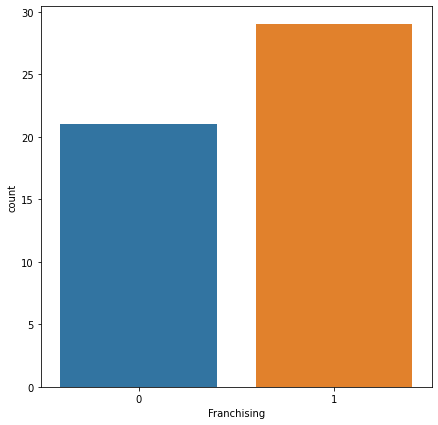

In [ ]:
 plt.figure(figsize=(7,7))
sns.countplot(x='Franchising',data=df)


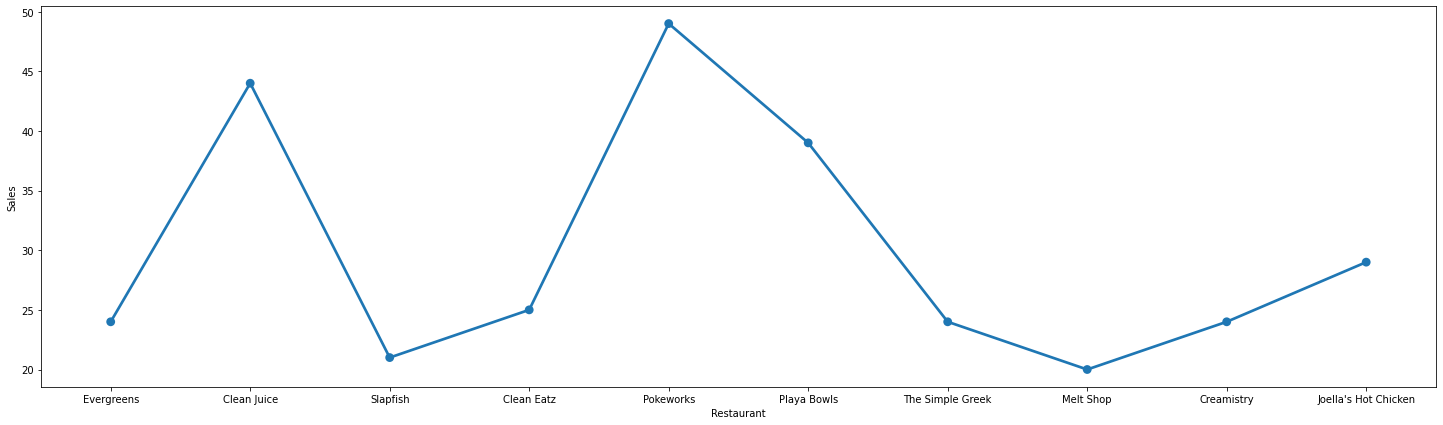

In [ ]:
plt.figure(figsize=(25,7))
sns.pointplot(x='Restaurant',y='Sales',data=df.head(10))


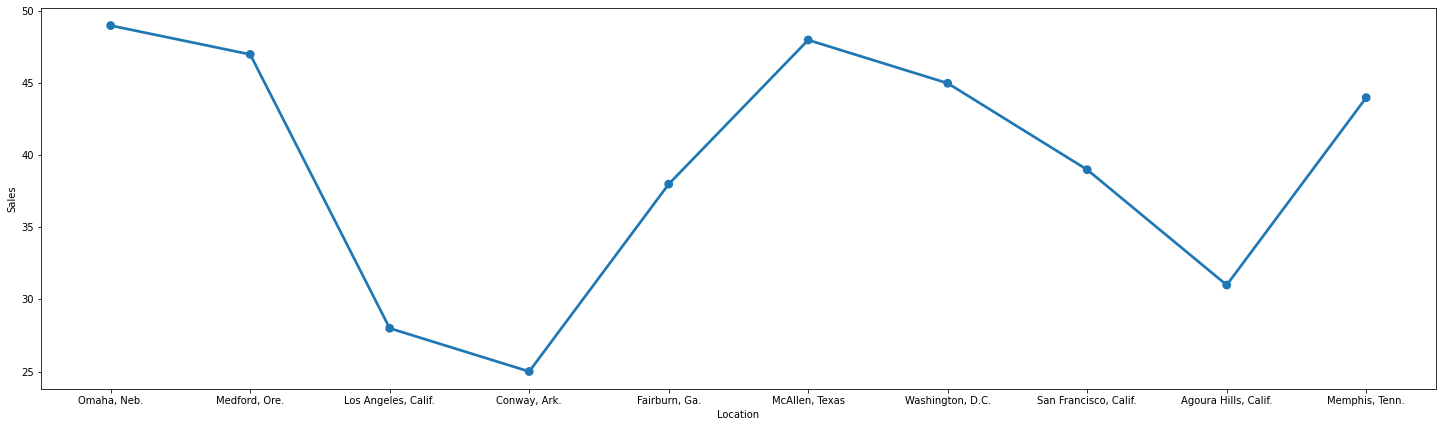

In [ ]:
plt.figure(figsize=(25,7))
sns.pointplot(x='Location',y='Sales',data=df.tail(10))


In [ ]:
x=df.drop('Franchising',axis=1)
x=x[['Sales','Units','Unit_Volume']]
y=df['Franchising']
print(x,y)

    Sales  Units  Unit_Volume
0      24     26         1150
1      44    105          560
2      21     21         1370
3      25     46          685
4      49     50         1210
5      39     76          580
6      24     36          775
7      20     19         1260
8      24     60          465
9      29     17         1930
10     30     41          860
11     39     50         1200
12     41     63          890
13     48     48         1175
14     21     12         1930
15     24     35          780
16     44     71          700
17     37     77          535
18     22      7         3800
19     39     33         1260
20     32      8         4300
21     44     90          530
22     23     12         2230
23     47     69          760
24     37     14         2800
25     39     15         2820
26     44     37         1330
27     28     31          970
28     28     22         1375
29     27     27         1130
30     20     26          785
31     42     38         1240
32     42 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
x_train,y_train,x_test,y_test 

(    Sales  Units  Unit_Volume
 25     39     15         2820
 39     29     21         1510
 8      24     60          465
 0      24     26         1150
 10     30     41          860
 5      39     76          580
 33     27      7         4260
 21     44     90          530
 26     44     37         1330
 44     38     32         1260
 17     37     77          535
 36     40     27         1540
 40     49     14         3500
 30     20     26          785
 20     32      8         4300
 43     25     16         1620
 29     27     27         1130
 49     44     28         1600
 19     39     33         1260
 6      24     36          775
 9      29     17         1930
 12     41     63          890
 48     31     13         2550
 38     38     15         2755
 4      49     50         1210
 14     21     12         1930
 13     48     48         1175
 31     42     38         1240
 7      20     19         1260
 18     22      7         3800
 3      25     46          685
 27     

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test) # 0:Overcast, 2:Mild
print(predicted)

[0 0 0 1 1 0 1 0 1 1 1 0 0 1 0]


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
yhat=clf.predict(x_test)
yhat


array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(y_test,predicted)
svm_accuracy=accuracy_score(y_test,yhat)
print("KNN accuracy: ",'%.3f'%(knn_accuracy*100),"%")
print("SVM accuracy: ",svm_accuracy*100,"%")


KNN accuracy:  73.333 %
SVM accuracy:  80.0 %


[[12876.70599967]]
r^2 score:  0.2541700244629368


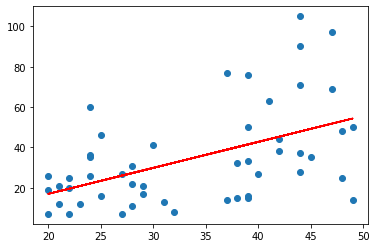

In [ ]:
x=df.Sales.values.reshape(-1,1)
y=df.Units.values.reshape(-1,1)
plt.scatter(x,y)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_head=lr.predict(x)
plt.plot(x,y_head,color="red")
plt.show
print(lr.predict(np.array(10000).reshape(-1,1)))
print("r^2 score: ",lr.score(x,y))

In [ ]:
from sklearn.tree import DecisionTreeRegressor


[32.]


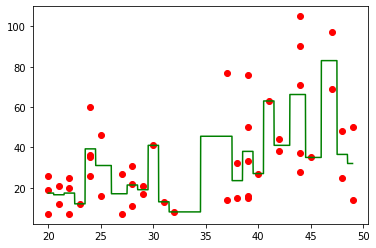

In [ ]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)
print(tree_reg.predict(np.array(10000).reshape(-1,1)))
x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head2=tree_reg.predict(x_)
plt.scatter(x,y,color="red")
plt.plot(x_,y_head2,color="green")
plt.show()